<a href="https://colab.research.google.com/github/mohammadsanaee/Timeseries-Forecasting/blob/main/Mohammad_Market_data_from_Apple!_Finance's_API_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install statsforecast -U

In [2]:

from statsforecast import StatsForecast
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
os.environ['NIXTLA_ID_AS_COL'] = '1'

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
from yfinance import Ticker

goog = Ticker('AAPL').history(period="2y", auto_adjust=True)
goog

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-05-16 00:00:00-04:00,143.921702,145.869664,142.567018,143.911804,86643800,0.00,0.0
2022-05-17 00:00:00-04:00,147.194681,148.094504,145.039061,147.570435,78336300,0.00,0.0
2022-05-18 00:00:00-04:00,145.207169,145.711458,138.334908,139.244629,109742900,0.00,0.0
2022-05-19 00:00:00-04:00,138.315141,140.075227,135.071836,135.813446,136095600,0.00,0.0
2022-05-20 00:00:00-04:00,137.533970,139.125959,131.126467,136.050751,137426100,0.00,0.0
...,...,...,...,...,...,...,...
2024-05-09 00:00:00-04:00,182.312720,184.409882,181.863333,184.320007,48983000,0.00,0.0
2024-05-10 00:00:00-04:00,184.899994,185.089996,182.130005,183.050003,50759500,0.25,0.0
2024-05-13 00:00:00-04:00,185.440002,187.100006,184.619995,186.279999,72044800,0.00,0.0


In [4]:
df = pd.DataFrame({'unique_id': 'AAPL', 'ds': goog.index.tz_localize(None), 'y': goog.Close.values})
df = df[(df.ds >= pd.to_datetime('2023-05-01')) & (df.ds <= pd.to_datetime('2024-05-12')) ]
df.ds = range(df.shape[0])
df.tail()

,unique_id,ds,y
495,AAPL,255,181.463882
496,AAPL,256,182.152924
497,AAPL,257,182.492477
498,AAPL,258,184.320007
499,AAPL,259,183.050003


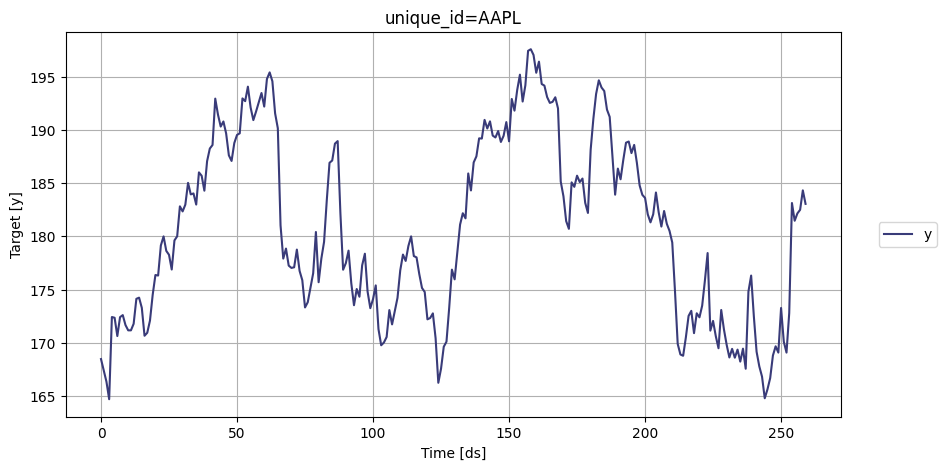

In [5]:
f = StatsForecast.plot(df)
f.set_figwidth(10)
f.set_figheight(5)
f

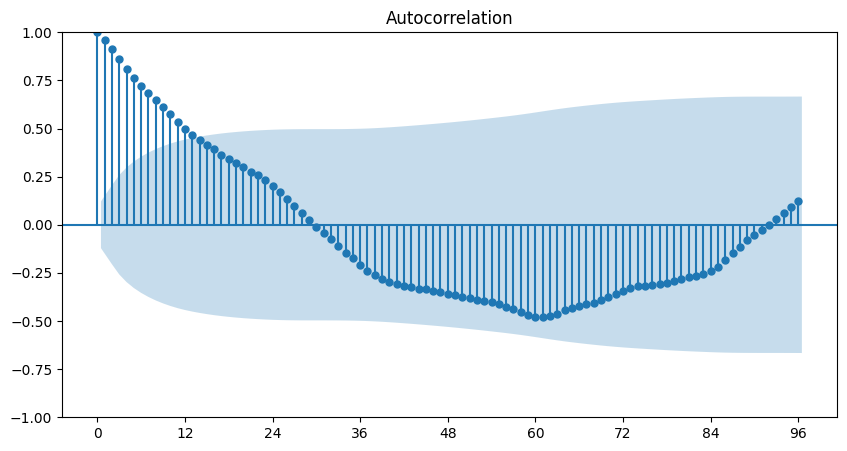

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rc("figure", figsize=(10,5))
plot_acf(df.y, lags=96)
plt.xticks(range(0, 97, 12))
plt.show()

In [7]:
from coreforecast.seasonal import find_season_length
find_season_length(df.y.values, max_season_length=100)

0

In [8]:
from statsmodels.tsa.stattools import kpss
kpss(df.y)

<ipython-input-8-6aa4b0438ce6>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(df.y)


(0.21176163585394125,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

**KPSS test shows that the data is stationary, we don't need box cox transformation but let's apply and see if it makes any changes**

In [9]:
from coreforecast.scalers import boxcox

In [10]:
from coreforecast.scalers import boxcox_lambda
best_lambda = boxcox_lambda(df.y.values, method='guerrero', season_length=12)
print(best_lambda)

-0.5998685428814783


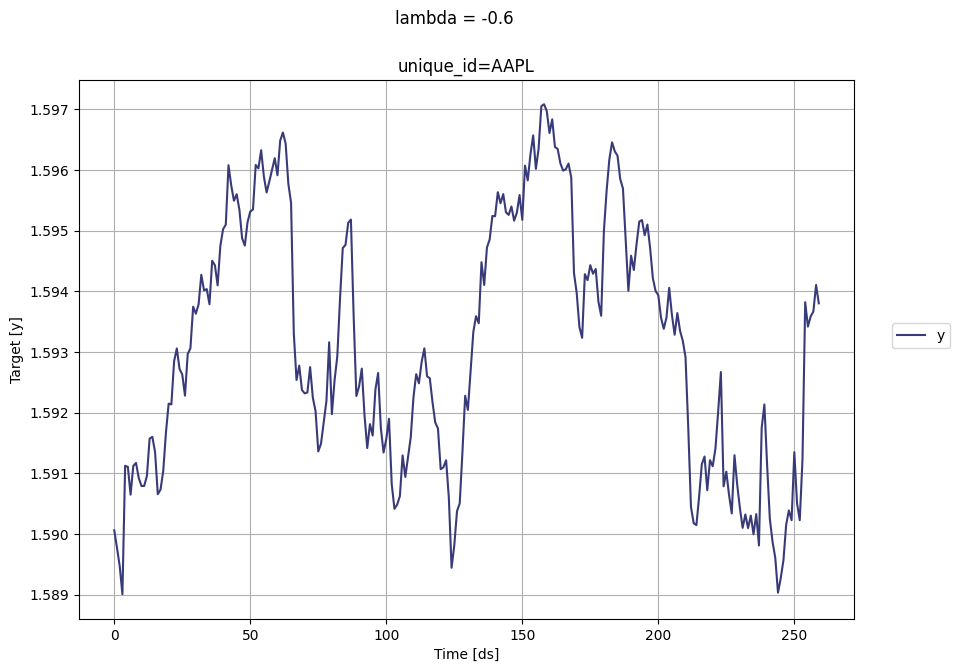

In [11]:
df_transformed = df.copy()
df_transformed.y = boxcox(df_transformed.y.values, best_lambda)

f = StatsForecast.plot(df_transformed)
f.set_figwidth(10)
f.set_figheight(7)
f.suptitle('lambda = ' + str(round(best_lambda, 3)))
f

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)


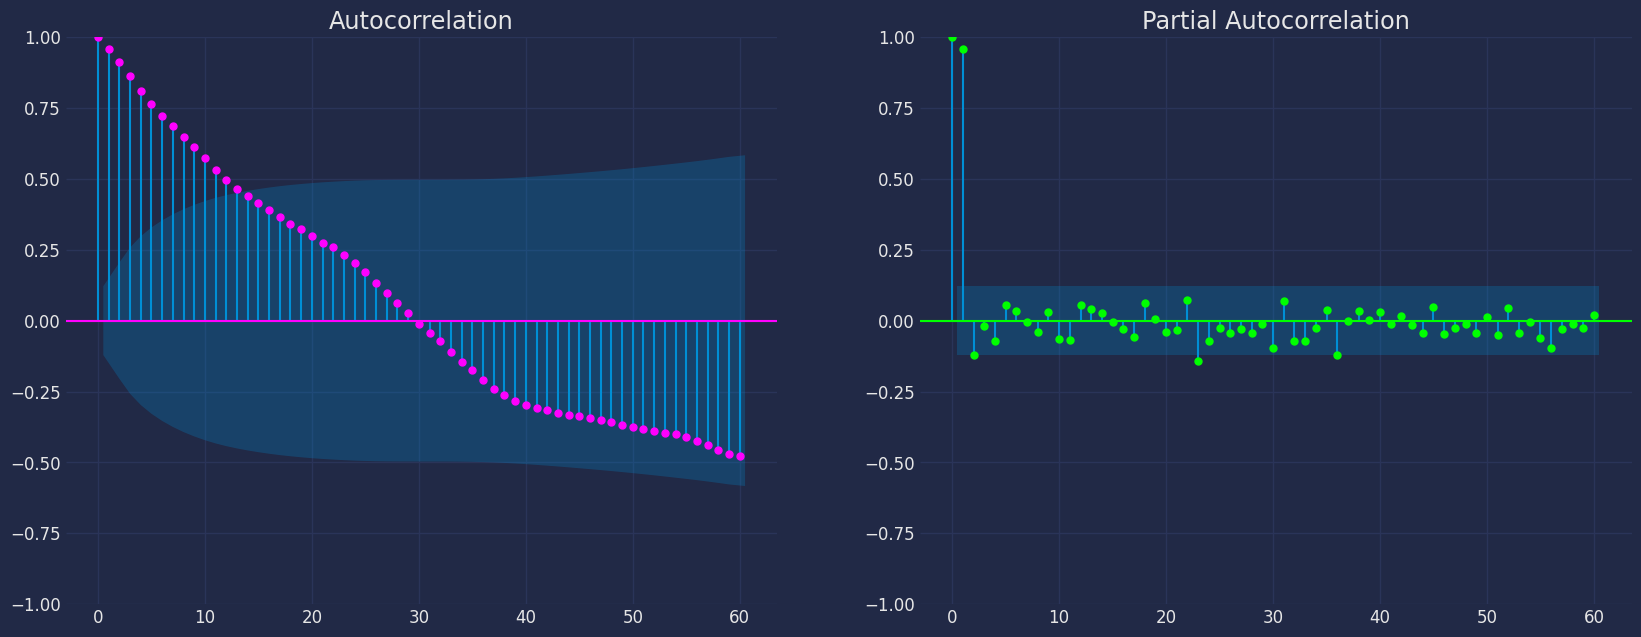

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=60, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

plot_pacf(df["y"],  lags=60, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();

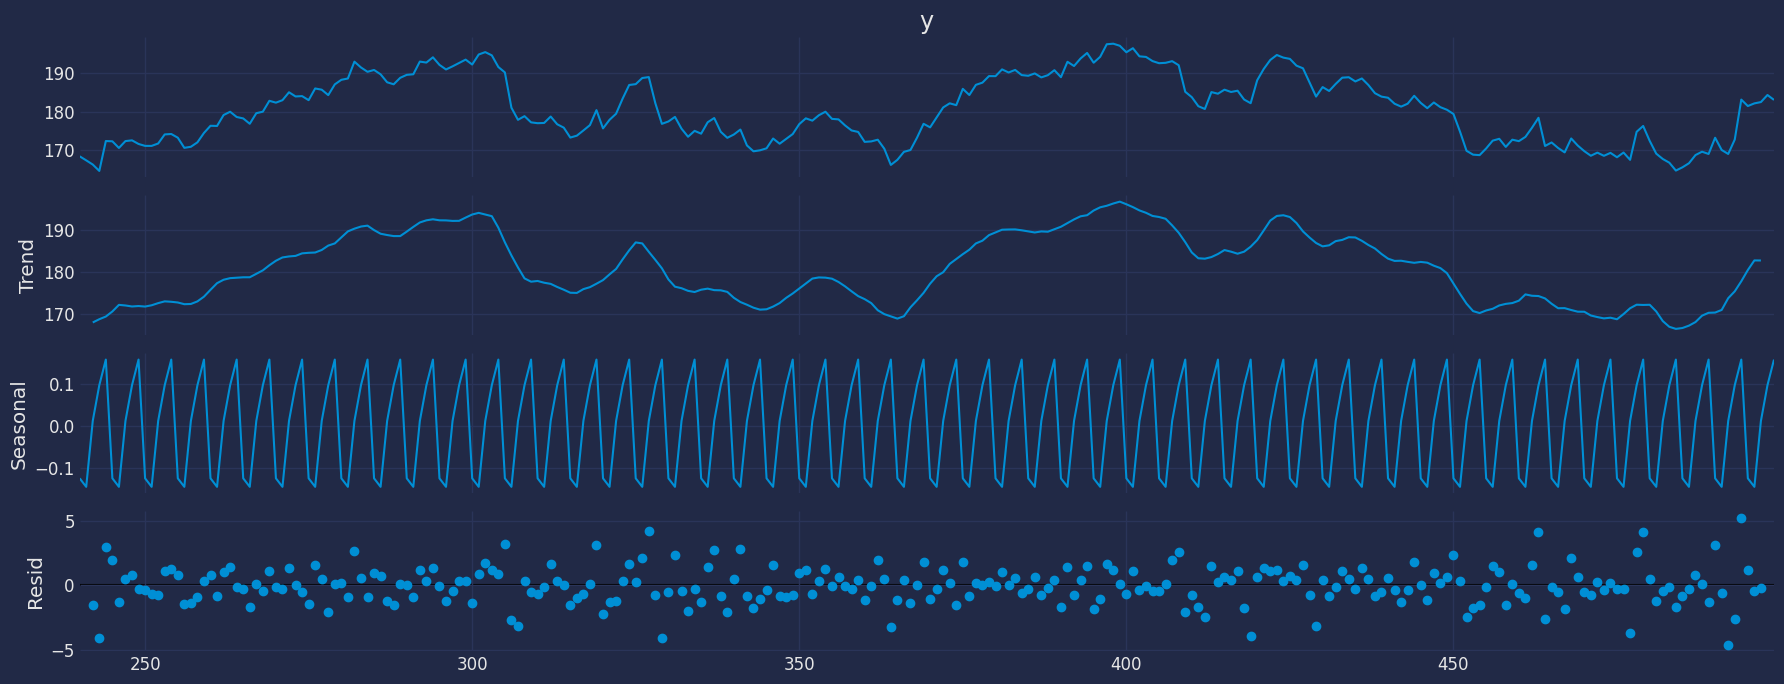

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
a = seasonal_decompose(df["y"], model = "add", period=5)
a.plot();

In [15]:
Y_train_df = df[df.ds<=249]
Y_test_df = df[df.ds>249]


In [16]:
Y_train_df.shape, Y_test_df.shape


((250, 3), (10, 3))

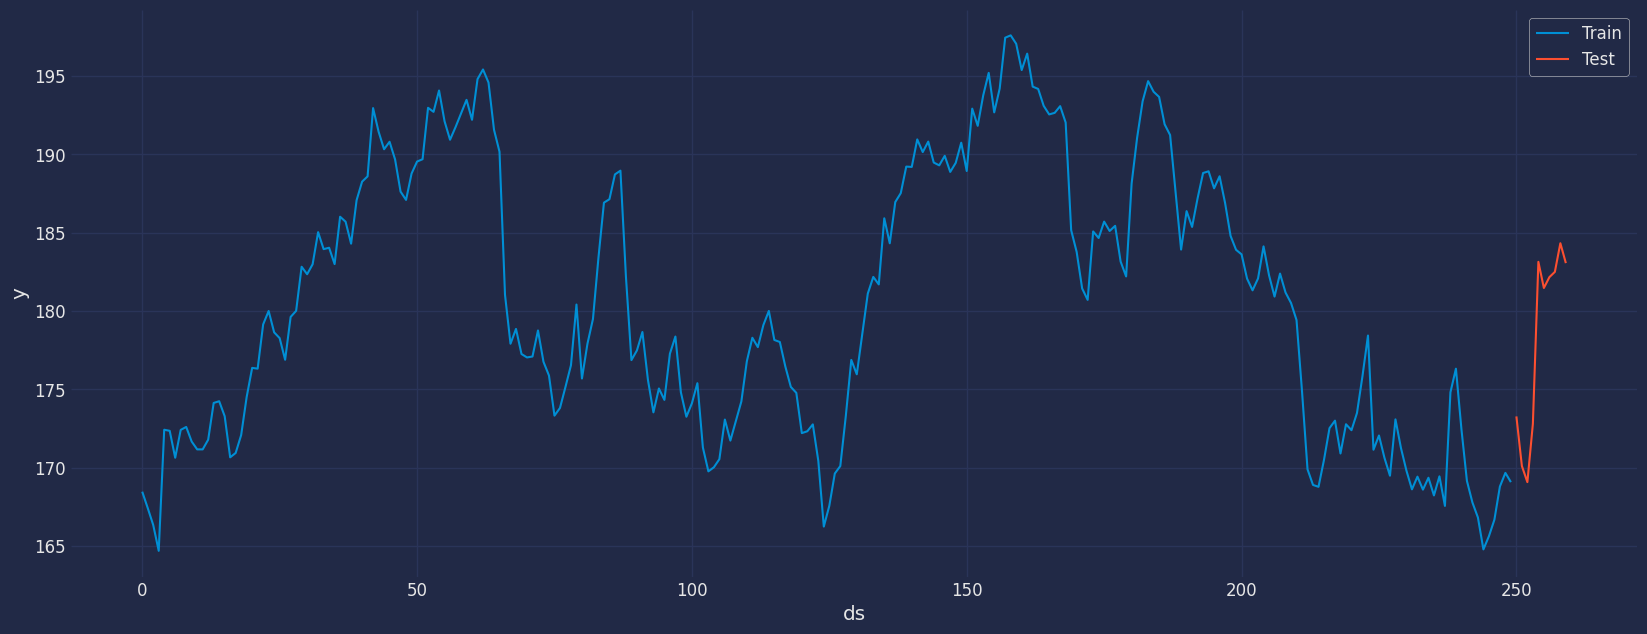

In [17]:
sns.lineplot(Y_train_df,x="ds", y="y", label="Train")
sns.lineplot(Y_test_df, x="ds", y="y", label="Test")
plt.show()

In [18]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string


In [19]:
season_length = 5
horizon = len(Y_test_df)

models = [AutoARIMA(season_length=season_length)]


In [20]:
sf = StatsForecast(df=Y_train_df,
                   models=models,
                   freq=1,
                   n_jobs=-1)


/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [21]:
sf.fit()


/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA])

In [22]:
sf.predict(h=10)

,unique_id,ds,AutoARIMA
0,AAPL,250,169.007706
1,AAPL,251,169.000992
2,AAPL,252,169.000259
3,AAPL,253,169.000183
4,AAPL,254,169.000183
5,AAPL,255,169.000183
6,AAPL,256,169.000183
7,AAPL,257,169.000183
8,AAPL,258,169.000183
9,AAPL,259,169.000183


In [23]:
# StatsForecast(models=[AutoARIMA],freq = 5)


In [24]:
arima_string(sf.fitted_[0,0].model_)
# Parameters of ARIMA model

'ARIMA(1,1,0)                   '

In [25]:
result=sf.fitted_[0,0].model_
print(result.keys())
print(result['arma'])





dict_keys(['coef', 'sigma2', 'var_coef', 'mask', 'loglik', 'aic', 'arma', 'residuals', 'code', 'n_cond', 'nobs', 'model', 'bic', 'aicc', 'ic', 'xreg', 'x', 'lambda'])
(1, 0, 0, 0, 1, 1, 0)


In [26]:
residual=pd.DataFrame(result.get("residuals"), columns=["residual Model"])
residual


,residual Model
0,0.168461
1,-1.037060
2,-0.971286
3,-1.533232
4,7.904441
...,...
245,1.056562
246,0.968919
247,2.004018
248,0.642570


In [27]:
# The residual mean is almost zero
residual.mean()

residual Model    0.002624
dtype: float64

<ipython-input-28-5ef7d9432844>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, ax=axs[0,1]);


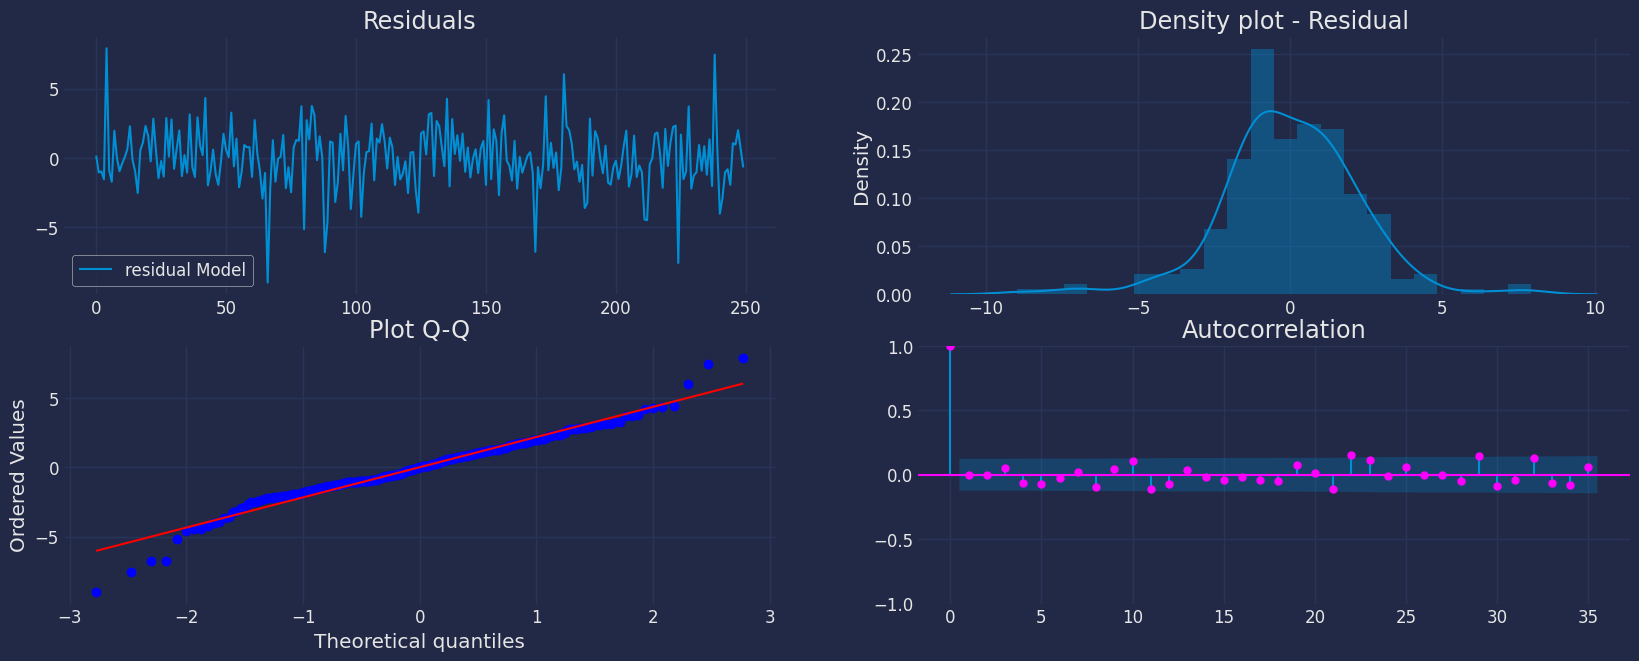

In [28]:
from scipy import stats

fig, axs = plt.subplots(nrows=2, ncols=2)

# plot[1,1]
residual.plot(ax=axs[0,0])
axs[0,0].set_title("Residuals");

# plot
sns.distplot(residual, ax=axs[0,1]);
axs[0,1].set_title("Density plot - Residual");

# plot
stats.probplot(residual["residual Model"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

# plot
plot_acf(residual,  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show();


In [29]:
Y_hat_df = sf.forecast(horizon, fitted=True)


/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [30]:
values=sf.forecast_fitted_values()


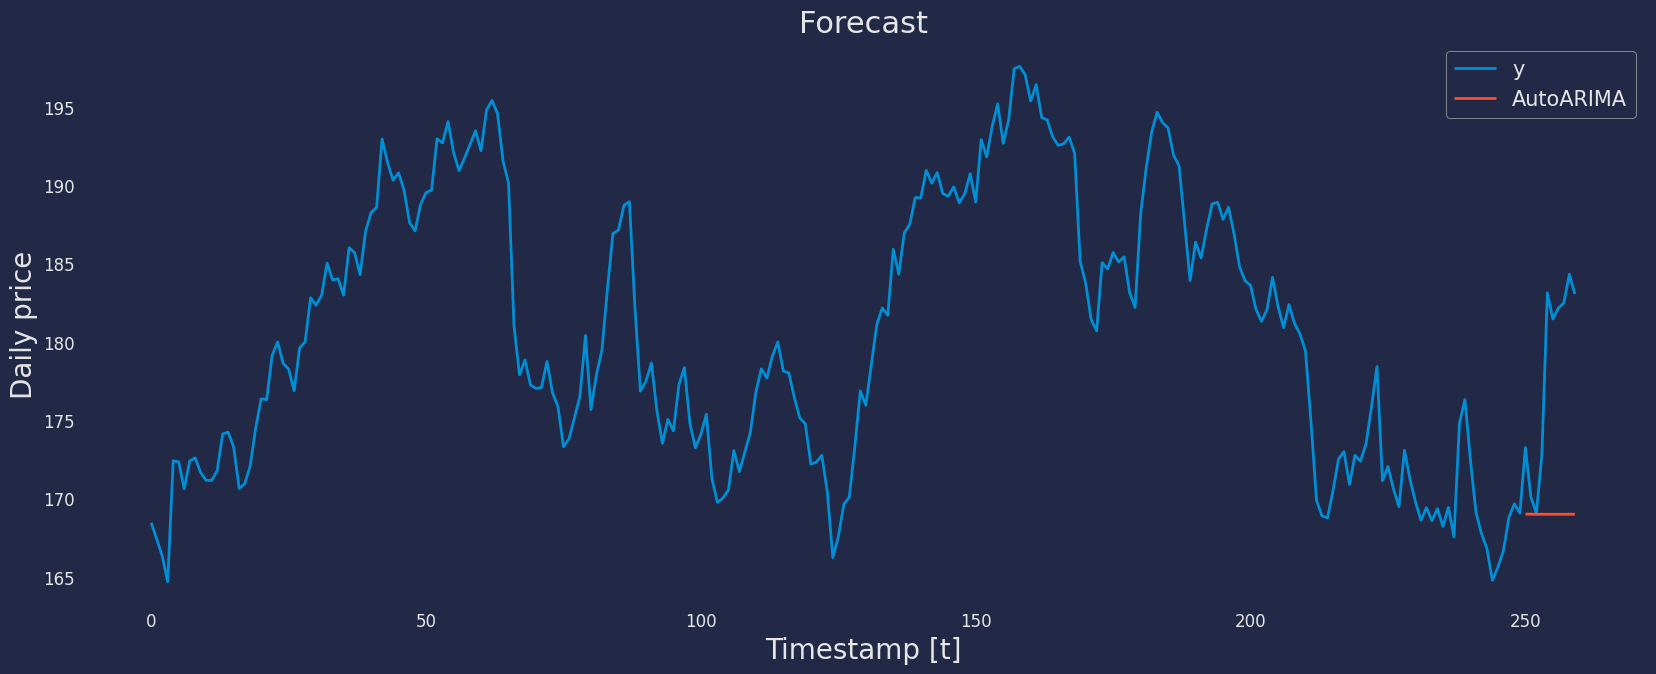

In [31]:
Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])

fig, ax = plt.subplots(1, 1, figsize=(18, 7))
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')
plot_df[['y', 'AutoARIMA']].plot(ax=ax, linewidth=2)
ax.set_title('Forecast', fontsize=22)
ax.set_ylabel('Daily price', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

plt.show()

In [32]:
forecast_df_arima = sf.predict(h=10, level = [80, 95])


In [33]:
df_plot=pd.concat([df, forecast_df_arima]).set_index('ds')


<ipython-input-34-6bfeb6851120>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_plot['AutoARIMA'], 'b-',  color="red", linewidth=2, label="AutoArima")


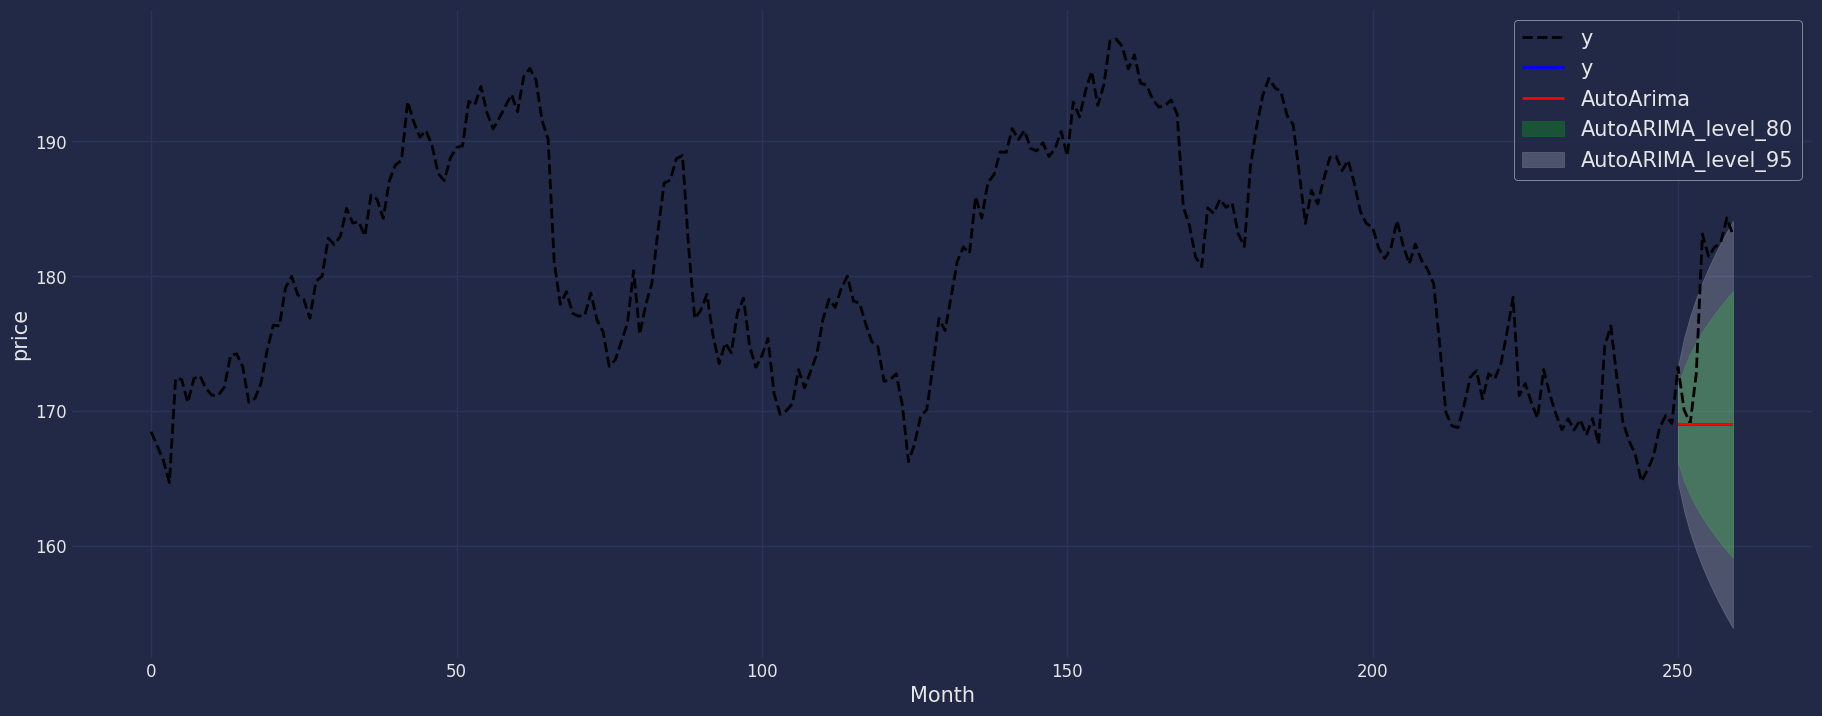

In [34]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

plt.plot(df_plot['y'], 'k--', df_plot['AutoARIMA'], 'b-', linewidth=2 ,label="y")
plt.plot(df_plot['AutoARIMA'], 'b-',  color="red", linewidth=2, label="AutoArima")

# Specify graph features:
ax.fill_between(df_plot.index,
                df_plot['AutoARIMA-lo-80'],
                df_plot['AutoARIMA-hi-80'],
                alpha=.20,
                color='lime',
                label='AutoARIMA_level_80')
ax.fill_between(df_plot.index,
                df_plot['AutoARIMA-lo-95'],
                df_plot['AutoARIMA-hi-95'],
                alpha=.2,
                color='white',
                label='AutoARIMA_level_95')
ax.set_title('', fontsize=20)
ax.set_ylabel('price', fontsize=15)
ax.set_xlabel('Month', fontsize=15)
ax.legend(prop={'size': 15})
ax.grid(True)
plt.show()


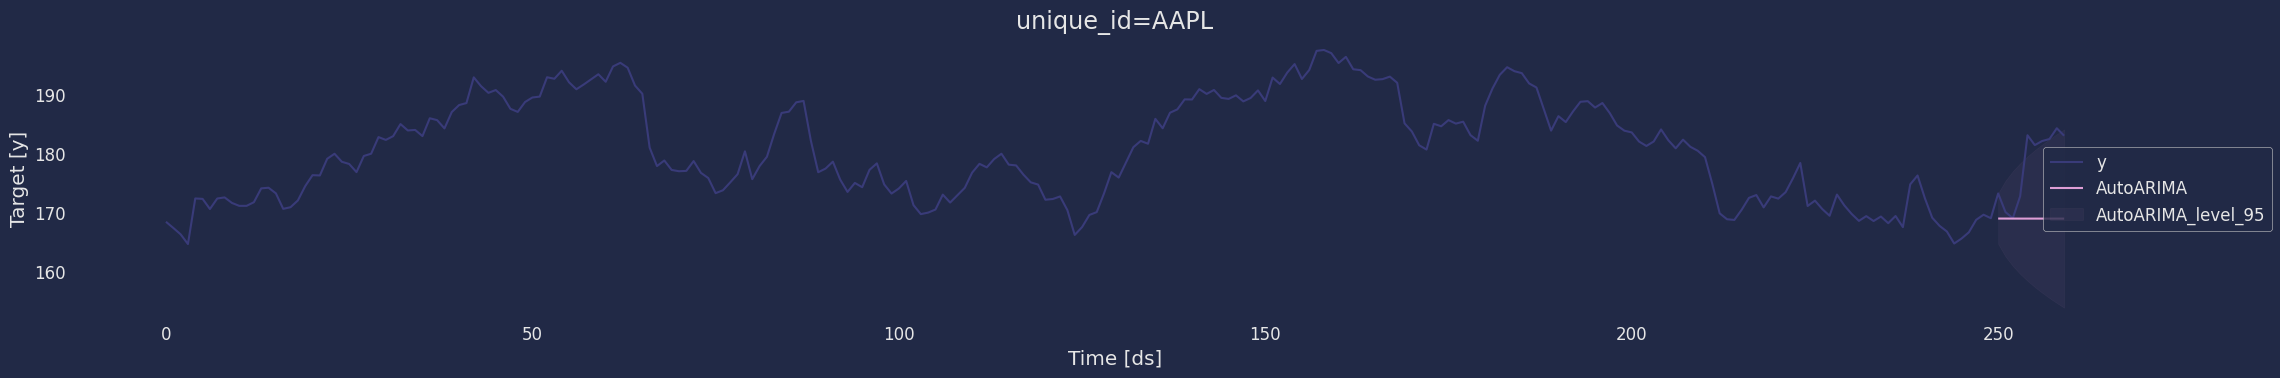

In [35]:
sf.plot(df, forecast_df_arima, level=[95])


In [36]:
crossvalidation_df = sf.cross_validation(df=Y_train_df,
                                         h=10,
                                         step_size=1,
                                         n_windows=20)


In [37]:
crossvalidation_df


,unique_id,ds,cutoff,y,AutoARIMA
0,AAPL,221,220,173.484695,172.332489
1,AAPL,222,220,175.841492,172.324890
2,AAPL,223,220,178.427994,172.323807
3,AAPL,224,220,171.137878,172.323654
4,AAPL,225,220,172.046646,172.323639
...,...,...,...,...,...
195,AAPL,245,239,165.615356,175.624939
196,AAPL,246,239,166.673920,175.743744
197,AAPL,247,239,168.791061,175.543381
198,AAPL,248,239,169.659882,176.233887


In [38]:
%%capture
%pip install datasetsforecast


In [39]:
from datasetsforecast.losses import mae, mape, mase, rmse, smape
rmse = rmse(crossvalidation_df['y'], crossvalidation_df["AutoARIMA"])
print("RMSE using cross-validation: ", rmse)


RMSE using cross-validation:  4.387857


In [40]:
from datasetsforecast.losses import mae, mape, mase, rmse, smape
from sklearn.metrics import r2_score

def evaluate_performance(y_hist, y_true, model):
    evaluation = {}
    evaluation[model] = {}
    metrics = {
        'mase': mase,
        'mae': mae,
        'mape': mape,
        'rmse': rmse,
        'smape': smape,
        'r2_score': r2_score
    }

    for metric_name, metric_func in metrics.items():
        if metric_name == 'mase':
            evaluation[model][metric_name] = metric_func(y_true['y'].values,
                                                         y_true[model].values,
                                                         y_hist['y'].values,
                                                         seasonality=5)
        elif metric_name == 'r2_score':
            evaluation[model][metric_name] = metric_func(y_true['y'].values, y_true[model].values)
        else:
            evaluation[model][metric_name] = metric_func(y_true['y'].values, y_true[model].values)

    return pd.DataFrame(evaluation).T

evaluate_performance(Y_train_df, Y_hat_df, model='AutoARIMA')


,mae,mape,mase,r2_score,rmse,smape
AutoARIMA,9.183124,5.052686,2.17674,-2.536295,10.843952,5.235881


** Auto Arima result is not sattisfying!**

In [41]:
from statsforecast.models import HistoricAverage, Naive, SeasonalNaive, RandomWalkWithDrift, WindowAverage, SeasonalWindowAverage

In [42]:
sf = StatsForecast(
    models = [HistoricAverage(), Naive(), SeasonalNaive(season_length=5), RandomWalkWithDrift(),
              WindowAverage(window_size=5, alias='WindowAverage5'),
              WindowAverage(window_size=10, alias='WindowAverage10'),
              WindowAverage(window_size=15, alias='WindowAverage15'),
              SeasonalWindowAverage(season_length=5, window_size=2, alias='SeasWA2'),
              SeasonalWindowAverage(season_length=5, window_size=3, alias='SeasWA3'),
              SeasonalWindowAverage(season_length=5, window_size=4, alias='SeasWA4')],
    freq = 1
)

sf.fit(Y_train_df)
forecast_df_basic = sf.predict(h=10)
# forecast_df_basic_test =forecast_df_basic[:14]
# forecast_df_basic_future =forecast_df_basic[14:]


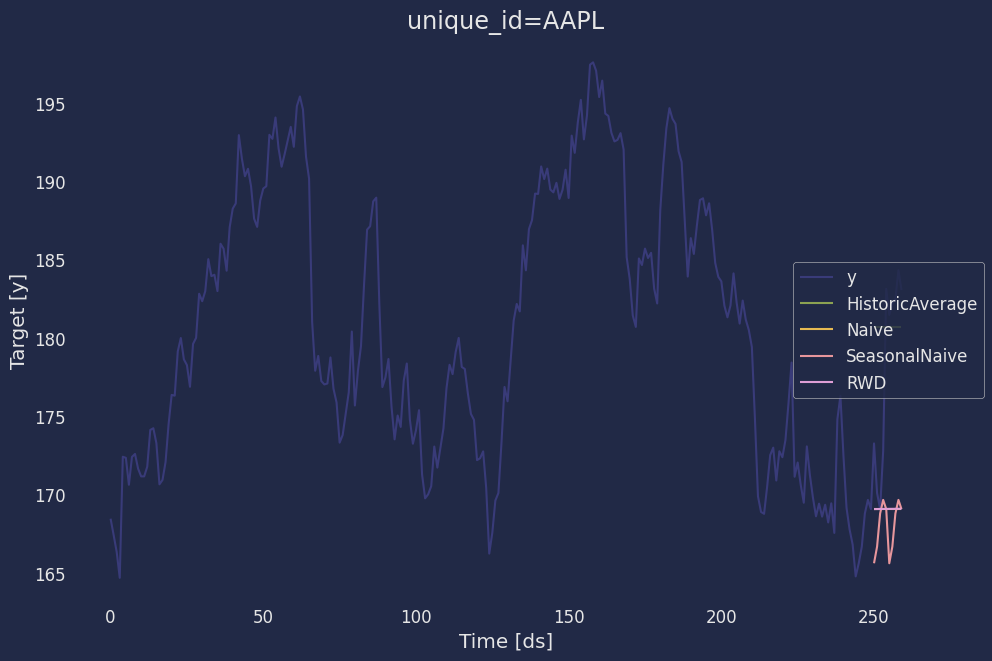

In [43]:
f = sf.plot(df, forecast_df_basic, models=['HistoricAverage', 'Naive', 'SeasonalNaive', 'RWD'])
f.set_figwidth(10)
f.set_figheight(7)
f

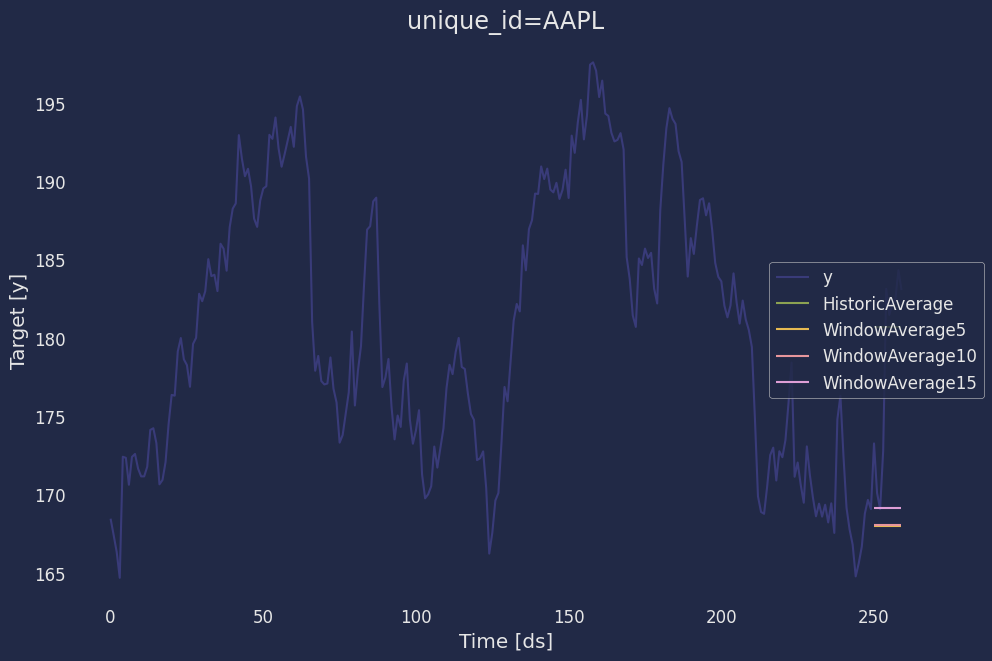

In [44]:
f = sf.plot(df, forecast_df_basic, models=['HistoricAverage', 'WindowAverage5', 'WindowAverage10', 'WindowAverage15'])
f.set_figwidth(10)
f.set_figheight(7)
f

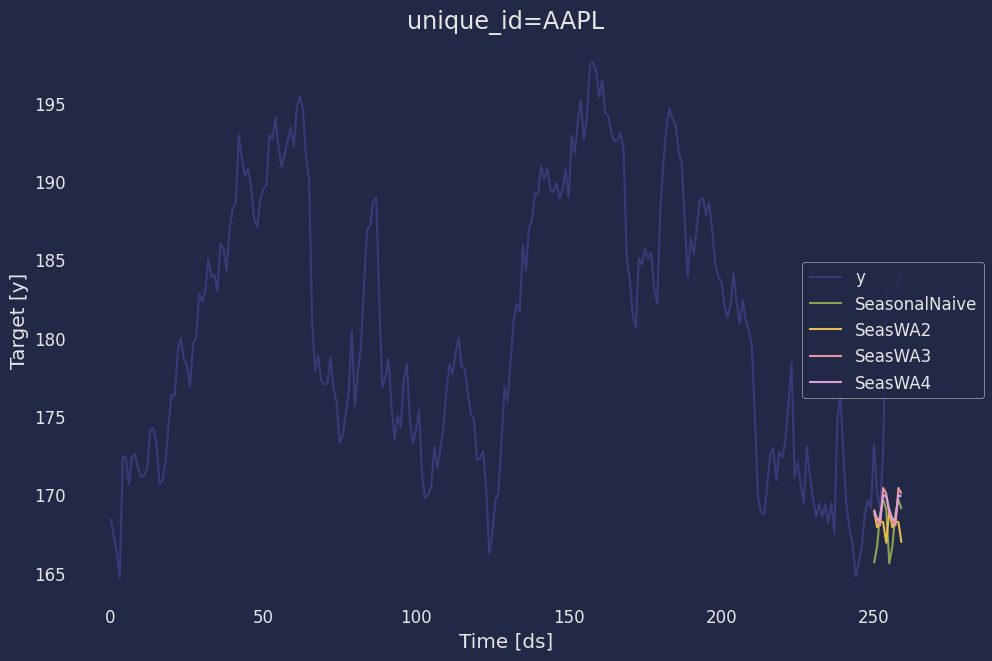

In [45]:
f = sf.plot(df, forecast_df_basic, models=['SeasonalNaive', 'SeasWA2', 'SeasWA3', 'SeasWA4'])
f.set_figwidth(10)
f.set_figheight(7)
f

In [46]:
crossvalidation_df = sf.cross_validation(df=Y_train_df,
                                         h=10,
                                         step_size=1,
                                         n_windows=20)



In [47]:
crossvalidation_df

,unique_id,ds,cutoff,y,HistoricAverage,Naive,SeasonalNaive,RWD,WindowAverage5,WindowAverage10,WindowAverage15,SeasWA2,SeasWA3,SeasWA4
0,AAPL,221,220,173.484695,182.061050,172.386185,172.516006,172.404022,172.312286,171.447449,174.591187,173.689423,176.097824,177.589127
1,AAPL,222,220,175.841492,182.061050,172.386185,172.995346,172.421875,172.312286,171.447449,174.591187,171.442459,175.089188,176.645401
2,AAPL,223,220,178.427994,182.061050,172.386185,170.898209,172.439713,172.312286,171.447449,174.591187,169.894562,173.654465,175.759109
3,AAPL,224,220,171.137878,182.061050,172.386185,172.765671,172.457550,172.312286,171.447449,174.591187,170.768372,174.013977,176.540558
4,AAPL,225,220,172.046646,182.061050,172.386185,172.386185,172.475388,172.312286,171.447449,174.591187,171.442459,174.100525,176.143585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,AAPL,245,239,165.615356,181.220642,176.310867,168.221832,176.507935,171.265701,170.210129,170.571304,169.010773,170.022720,170.613586
196,AAPL,246,239,166.673920,181.220642,176.310867,169.440170,176.540771,171.265701,170.210129,170.571304,169.025726,169.556686,170.538696
197,AAPL,247,239,168.791061,181.220642,176.310867,167.552734,176.573624,171.265701,170.210129,170.571304,168.486465,168.817688,170.573639
198,AAPL,248,239,169.659882,181.220642,176.310867,174.802902,176.606461,171.265701,170.210129,170.571304,171.697113,172.156494,173.724365


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_true_cv = crossvalidation_df['y']

y_train_cv = crossvalidation_df['y'].values

models_cv = forecast_df_basic.columns[2:]
results_cv = pd.DataFrame(index=models_cv, columns=['mae','rmse', 'r2_score'])

for model in models_cv:
    y_pred = crossvalidation_df[model]
    results_cv.loc[model, 'mae'] = mean_absolute_error(y_true_cv, y_pred)
    results_cv.loc[model, 'rmse'] = rmse(y_true_cv, y_pred)
    results_cv.loc[model, 'r2_score'] = r2_score(y_true_cv, y_pred)

print(results_cv)



                       mae       rmse   r2_score
HistoricAverage  11.567648  11.908488 -15.985087
Naive             3.324392   4.291771  -1.206112
SeasonalNaive     3.105489   3.914868  -0.835645
RWD                3.38425    4.37119  -1.288515
WindowAverage5    2.984334   3.480871   -0.45121
WindowAverage10   2.948781   3.364513   -0.35581
WindowAverage15   3.170701   3.454125  -0.428994
SeasWA2           2.981109     3.5851  -0.539419
SeasWA3           3.078525   3.529309   -0.49188
SeasWA4           3.965872   4.319663  -1.234879


In [49]:

y_true = Y_test_df['y']

y_train = Y_train_df['y'].values

models = forecast_df_basic.columns[2:]
results = pd.DataFrame(index=models, columns=['mae','rmse', 'r2_score'])

for model in models:
    y_pred = forecast_df_basic[model]
    results.loc[model, 'mae'] = mean_absolute_error(y_true, y_pred)
    results.loc[model, 'rmse'] = np.sqrt(mean_squared_error(y_true, y_pred))
    results.loc[model, 'r2_score'] = r2_score(y_true, y_pred)

print(results)


                       mae       rmse  r2_score
HistoricAverage   4.999046   6.289413  -0.18958
Naive             9.113469  10.784619 -2.497703
SeasonalNaive    10.221968  11.690662 -3.110091
RWD               9.101472   10.77005 -2.488259
WindowAverage5   10.221974   11.73633 -3.142265
WindowAverage10  10.106129  11.635572 -3.071447
WindowAverage15   9.057549  10.725615 -2.459535
SeasWA2          10.106123  11.767354 -3.164194
SeasWA3           9.043565  10.590255 -2.372765
SeasWA4           9.040068  10.608516 -2.384407


**Even though the best result is from HistoricAverage model, Crossvalidation suggests window average and this result is better than Auto arima so I will continue with window average**

In [50]:
from statsforecast.utils import ConformalIntervals
sfwa = StatsForecast( models=[WindowAverage(window_size=10, alias='WindowAverage10',prediction_intervals=ConformalIntervals())], freq=1)


sfwa.fit(df)
yhat_windowAverage = sfwa.predict(h= 10,level = [80, 95])



In [51]:
yhat_windowAverage

,unique_id,ds,WindowAverage10,WindowAverage10-lo-95,WindowAverage10-lo-80,WindowAverage10-hi-80,WindowAverage10-hi-95
0,AAPL,260,178.184143,169.389542,170.005142,186.363144,186.978745
1,AAPL,261,178.184143,169.389542,170.005142,186.363144,186.978745
2,AAPL,262,178.184143,169.389542,170.005142,186.363144,186.978745
3,AAPL,263,178.184143,169.389542,170.005142,186.363144,186.978745
4,AAPL,264,178.184143,169.389542,170.005142,186.363144,186.978745
5,AAPL,265,178.184143,169.389542,170.005142,186.363144,186.978745
6,AAPL,266,178.184143,169.389542,170.005142,186.363144,186.978745
7,AAPL,267,178.184143,169.389542,170.005142,186.363144,186.978745
8,AAPL,268,178.184143,169.389542,170.005142,186.363144,186.978745
9,AAPL,269,178.184143,169.389542,170.005142,186.363144,186.978745


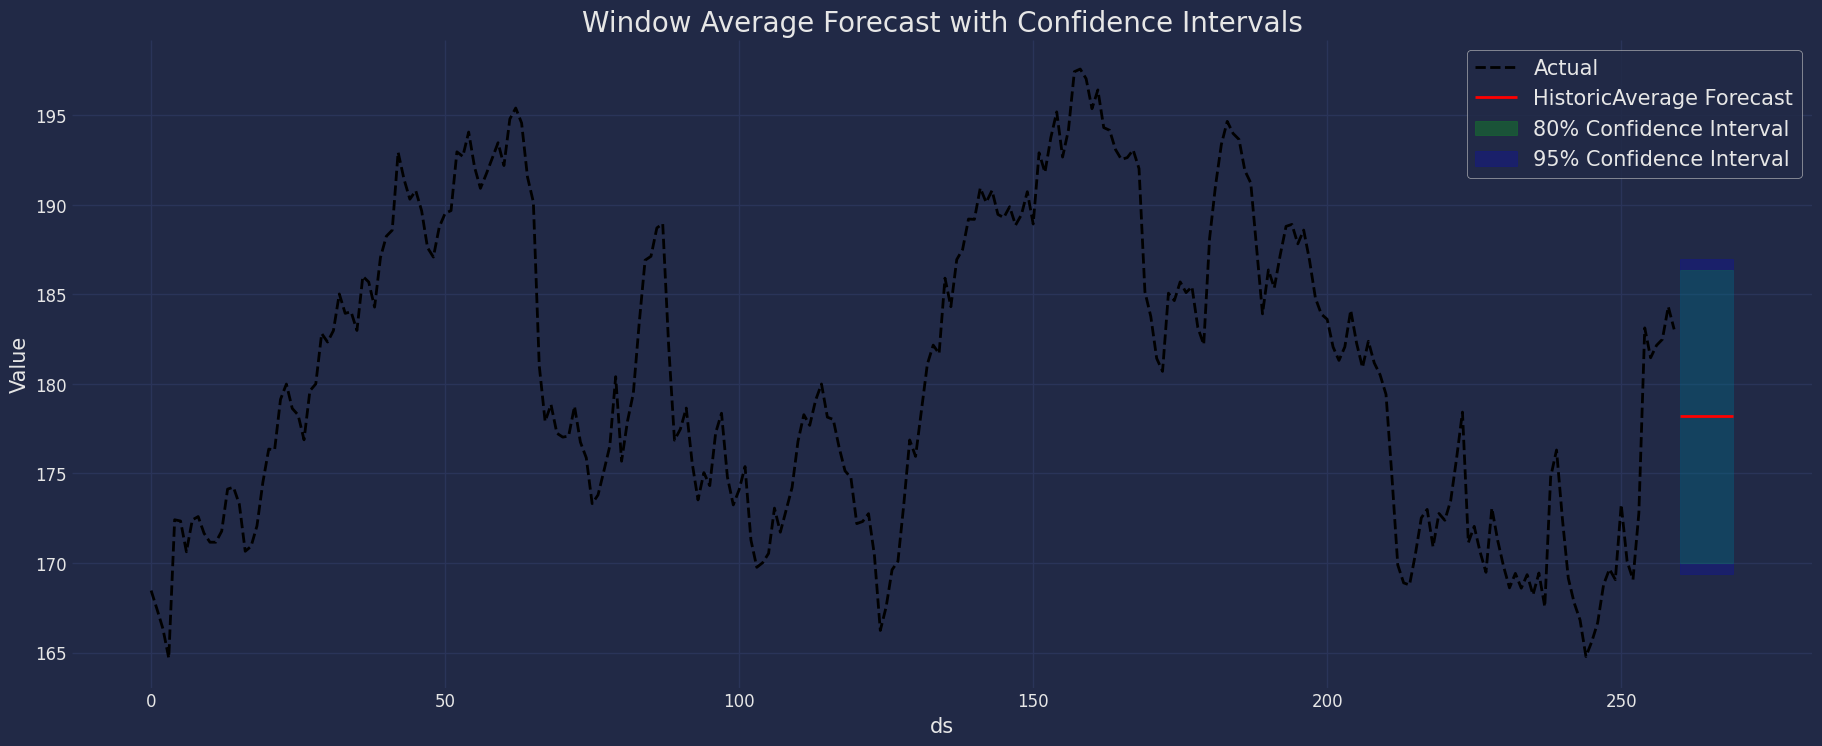

In [52]:

fig, ax = plt.subplots(1, 1, figsize=(20, 8))

plt.plot(df['ds'], df['y'], 'k--', label="Actual", linewidth=2)
plt.plot(yhat_windowAverage['ds'], yhat_windowAverage['WindowAverage10'], color="red", label="HistoricAverage Forecast", linewidth=2)

ax.fill_between(yhat_windowAverage['ds'],
                yhat_windowAverage['WindowAverage10-lo-80'],
                yhat_windowAverage['WindowAverage10-hi-80'],
                alpha=0.20, color='lime', label='80% Confidence Interval')

ax.fill_between(yhat_windowAverage['ds'],
                yhat_windowAverage['WindowAverage10-lo-95'],
                yhat_windowAverage['WindowAverage10-hi-95'],
                alpha=0.2, color='blue', label='95% Confidence Interval')

ax.set_title('Window Average Forecast with Confidence Intervals', fontsize=20)
ax.set_ylabel('Value', fontsize=15)
ax.set_xlabel('ds', fontsize=15)
ax.legend(prop={'size': 15})
ax.grid(True)
plt.show()

The best result !

In [53]:
yhat_windowAverage

,unique_id,ds,WindowAverage10,WindowAverage10-lo-95,WindowAverage10-lo-80,WindowAverage10-hi-80,WindowAverage10-hi-95
0,AAPL,260,178.184143,169.389542,170.005142,186.363144,186.978745
1,AAPL,261,178.184143,169.389542,170.005142,186.363144,186.978745
2,AAPL,262,178.184143,169.389542,170.005142,186.363144,186.978745
3,AAPL,263,178.184143,169.389542,170.005142,186.363144,186.978745
4,AAPL,264,178.184143,169.389542,170.005142,186.363144,186.978745
5,AAPL,265,178.184143,169.389542,170.005142,186.363144,186.978745
6,AAPL,266,178.184143,169.389542,170.005142,186.363144,186.978745
7,AAPL,267,178.184143,169.389542,170.005142,186.363144,186.978745
8,AAPL,268,178.184143,169.389542,170.005142,186.363144,186.978745
9,AAPL,269,178.184143,169.389542,170.005142,186.363144,186.978745
